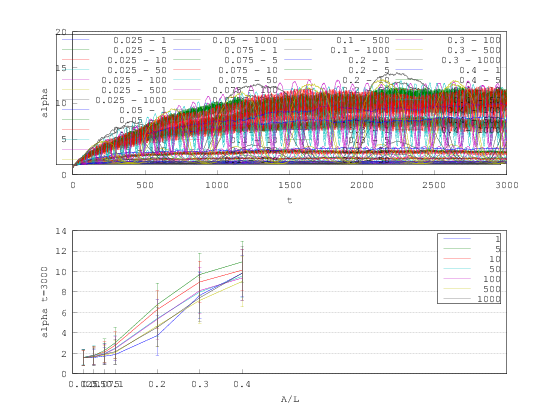

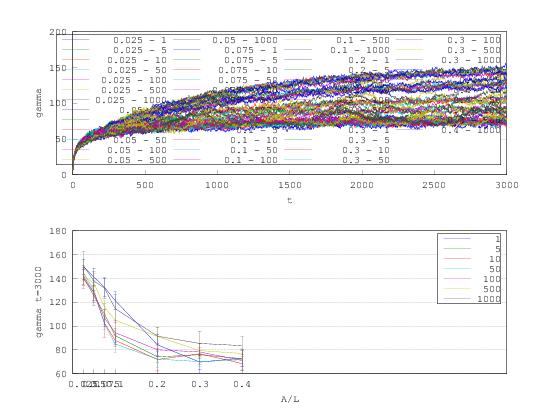

In [15]:
    symType=2;   %1: Symmetry;  2: Asymmetry Distance  3: Asymmetry Distance and Centrality
    Afilter='A*'; %'A0.6*';
    GPTfilter='GPT*';%'GPT0500*'; %'GPT0001';        %'GPT0500*';        
    selG=3000;
    
    switch symType
      case 1 %Symmetry
        symFilter='Sym*';
        fig_name='Symmetric';
        resultsFileName='Sym';
      case 2 %Asymmetry Distance
        symFilter='ASymD*';
        fig_name='Asymmetric Distance';
        resultsFileName='SymD';
      case 3 %Asymmetry Distance and Centrality
        symFilter='AsymDC*';
        fig_name='Asymmetric Distance and Centrality';
        resultsFileName='SymDC';
    end
    
    files=dir([symFilter Afilter GPTfilter '.txt']); %symmetry
    
    numcolors=100;
    cmap=lines(numcolors);
    markers={'-o','-*','-+','-s','-d','-x'};
    

    
        
    AyGPT=[];
    for ixf=1:numel(files),
        partes=regexp(files(ixf).name,'_','split');
        A=str2num(partes{2}(2:end));
        GPT=str2num(partes{3}(4:regexp(partes{3},'\.')-1));
        AyGPT(end+1,:)=[A GPT];
    end
    
    [AyGPTsorted,sortInd]=sortrows(AyGPT);
    
    As=unique(AyGPT(:,1));
    cantAs=numel(As);
    GPTs=unique(AyGPT(:,2));
    cantGPTs=numel(GPTs);
    
        %========= GAMMA
    %hfigGamma=figure('name',[fig_name ' Gamma']);  
    subplot(2,1,1);
    ylabel('gamma');
    xlabel('t');
    hold on;  
    leyendas={};
        
    
    mark_count=0;
    for ixFile=1:numel(files),    
            
            fileName=files(sortInd(ixFile)).name;
            
            A=AyGPTsorted(ixFile,1);
            GPT=AyGPTsorted(ixFile,2);
            
            data=dlmread(fileName);
            gamma_aver=mean(data(1:3:end,:),1);
            gamma_std=std(data(1:3:end,:),1);
            %alfa_aver_aver=mean(data(2:3:end,:),1);
            %alfa_sd_aver=mean(data(3:3:end,:),1);
            
            
            mark_count=mark_count+1;
            %plot(gamma_aver,markers{mod(mark_count-1,numel(markers))+1});
            hline=plot(gamma_aver);%,'linecolor',cmap(mark_count,:));
            set(hline,'color',cmap(mark_count,:));
            leyendas{end+1}=[num2str(A) ' - ' num2str(GPT)];
            
            ixA=find(As==A);
            ixGPT=find(GPTs==GPT);
            gamma_avr_at_AyW(ixA,ixGPT)=gamma_aver(selG);
            gamma_std_at_AyW(ixA,ixGPT)=gamma_std(selG);
    end        
    
    set(gca,'YGrid','on')
    %save([resultsFileName '_gamma_at_t' num2str(selG) '.mat'],'-mat','gamma_avr_at_AyW','gamma_std_at_AyW','As','GPTs'),
    
    legend(leyendas);
    
    hfig=subplot(2,1,2);    
    ylabel(['gamma @ t=' num2str(selG)]);
    xlabel('A/L');
    hold on;    
    leyendas={};
    mark_count=0;
    for ixGPT=1:cantGPTs,
        mark_count=mark_count+1;
        %h=plot(gamma_avr_at_AyW(:,ixGPT),markers{mod(mark_count-1,numel(markers))+1});
        %h.LineWidth=1.5;        
        h=errorbar(As,gamma_avr_at_AyW(:,ixGPT),gamma_std_at_AyW(:,ixGPT));
        set(h,'color',cmap(mark_count,:));
        
        leyendas{end+1}=[num2str(GPTs(ixGPT))];
    end
    %set(hfig,'xtick',[1:cantAs]);
    %set(hfig,'xticklabel',unique(AyGPT(:,1)));
    set(hfig,'xtick',As);
    set(hfig,'xticklabel',As);
    %xticklabels();
    legend(leyendas);
    xlim([0 1.025])
    set(gca,'YGrid','on')
    hola=1;
    %savefig(hfigGamma,'gamma.fig')

       %========= ALPHA
    hfigAlpha=figure('name',[fig_name ' Alpha']);  
    subplot(2,1,1);
    ylabel('alpha');
    xlabel('t');
    hold on;  
    leyendas={};
    
    
    
    mark_count=0;
    for ixFile=1:numel(files),    
            
            fileName=files(sortInd(ixFile)).name;
            
            A=AyGPTsorted(ixFile,1);
            GPT=AyGPTsorted(ixFile,2);
            
            data=dlmread(fileName);
            %gamma_aver=mean(data(1:3:end,:),1);
            %gamma_std=std(data(1:3:end,:),1);
            alfa_aver_aver=mean(data(2:3:end,:),1);
            alfa_sd_aver=mean(data(3:3:end,:),1);
                        
            mark_count=mark_count+1;
            %plot(gamma_aver,markers{mod(mark_count-1,numel(markers))+1});
            hline=plot(alfa_aver_aver);%,'linecolor',cmap(mark_count,:));
            %hline=errorbar(alfa_aver_aver,alfa_sd_aver);
            set(hline,'color',cmap(mark_count,:));
            leyendas{end+1}=[num2str(A) ' - ' num2str(GPT)];
            
            ixA=find(As==A);
            ixGPT=find(GPTs==GPT);
            alfa_avr_at_AyW(ixA,ixGPT)=alfa_aver_aver(selG);
            alfa_std_at_AyW(ixA,ixGPT)=alfa_sd_aver(selG);
    end        
        
    set(gca,'YGrid','on')
    %save([resultsFileName '_alfa_at_t' num2str(selG) '.mat'],'-mat','alfa_avr_at_AyW','alfa_std_at_AyW','As','GPTs'),
    
    legend(leyendas);
    
    hfig=subplot(2,1,2);
    ylabel(['alpha @ t=' num2str(selG)]);
    xlabel('A/L');
    hold on;    
    leyendas={};
    mark_count=0;
    for ixGPT=1:cantGPTs,
        mark_count=mark_count+1;
        %h=plot(gamma_avr_at_AyW(:,ixGPT),markers{mod(mark_count-1,numel(markers))+1});
        %h.LineWidth=1.5;        
        h=errorbar(As,alfa_avr_at_AyW(:,ixGPT),alfa_std_at_AyW(:,ixGPT));
        set(h,'color',cmap(mark_count,:));
        
        leyendas{end+1}=[num2str(GPTs(ixGPT))];
    end
    %set(hfig,'xtick',[1:cantAs]);
    %set(hfig,'xticklabel',unique(AyGPT(:,1)));
    set(hfig,'xtick',As);
    set(hfig,'xticklabel',As);
    %xticklabels();
    legend(leyendas);
    xlim([0 1.025])
    set(gca,'YGrid','on')
    %savefig(hfigAlpha,'alpha.fig') 
    
    